# Descobrindo moléculas hipotéticas utilizando algoritmos genéticos
--------------

Neste trabalho, utilizaremos algoritmos genéticos para simular interações de moléculas baseando-se em propriedades de grupos funcionais, como polaridade, raio atômico e densidade de carga.
<p>
$\textbf{Grupo:}$ Marina Barim do Nascimento, Guilherme Gurian Dariani, Pedro Henrique Sophia, Tiago Marques Bigardi

## Objetivo
- Encontrar moléculas que, baseando-se em suas propriedades e grupos funcionais, poderiam interagir e formar novas moléculas.

## Importações

In [ ]:
from grupos_funcionais import detector_de_grupos_funcionais, grupos_funcionais, seletor_de_grupos_funcionais, grupo_funcional_aleatorio
from funcoes import fitness, new_pop, roull_sel_max, mutacao, crossover, new_ind

import pubchempy as pcp

from rdkit import Chem
from rdkit.Chem.Draw import MolToImage
from rdkit.Chem.rdMolDescriptors import CalcMolFormula

from PIL import ImageTk
import tkinter as tk

## Constantes

In [11]:
TAM_POP = 10 # Tamanho da população
NUM_GEN = 1000 # Número de gerações que realizaremos
MAX_GROUPS = 10 # O máximo de grupos funcionais que uma molécula pode conter
PM = 0.3 # Probabilidade de mutação
PC = 0.75 # Probabilidade de cruzamento

## Código e discussão

Compound(122208748)
C35H49N7O13S2
Grupos funcionais presentes na molécula pepe:
['Ácidos carboxilicos alifáticos', 'Hidroxilas aromáticas', 'Ácidos carboxilicos', 'Ácidos carboxílicos', 'Carbonilas O', 'Carbonilas O excluindo COOH', 'Aminas', 'Aminas secundárias', 'Aminas primárias', 'Aminas terc-alicíclicas', 'Grupos tiol', 'Amidas', 'Anéis de benzeno', 'Ésters', 'Éters', 'Fenóis', 'OH fenólico excluindo substituintes Hbond intramoleculares orto']


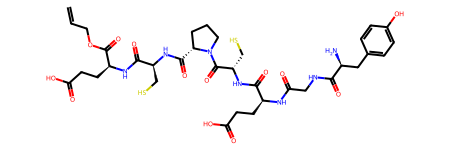

In [12]:
molecule = 'pepe' # Input("Nome da molécula de referência: ")

try:
    df = pcp.get_compounds(molecule, 'name', as_dataframe=True) # Coleta da molécula na biblioteca rdkit a partir do seu nome, e sua atribuição no formato de dataframe
    smiles = df["canonical_smiles"] # Obtenção do SMILES da molécula em sua forma canônica (não-isômero)
except:
    raise Exception('Nome de molécula desconhecido.')

results = pcp.get_compounds(molecule, 'name') # Composto encontrado pelo nome da molécula
# Para cada propriedade da molécula, iremos mostrá-la
for compound in results:
    print(compound)
    mol = Chem.MolFromSmiles(compound.isomeric_smiles)
    print(CalcMolFormula(mol))

groups_list = list(seletor_de_grupos_funcionais(detector_de_grupos_funcionais(molecule)).keys()) # Lista de grupos funcionais da molécula
print("Grupos funcionais presentes na molécula ", molecule, ":\n", groups_list, sep='')

mol # Plot da molécula pelo rdkit 

In [13]:
pop = new_pop(TAM_POP, MAX_GROUPS, molecule)

---

## Gerações

In [14]:
gen = 1
while gen <= NUM_GEN:
    print("gen ", gen, ":", sep="")
    if gen > 1: # Verifica se não é a primeira geração, a fim de evitar a seleção na primeira iteração
        pop = roull_sel_max(pop) # Aplicando a função de seleção na população desta geração
        pop_inds = [pop[i]["ind"] for i in pop] # Obtendo lista de indivíduos
        p1_list = pop_inds[0::2] # Seleção em um individuo progenitor 1 (pares)
        p2_list = pop_inds[1::2] # Seleção em um individuo progenitor 2 (ímpares)
        c = 1
        for p1, p2 in zip(p1_list, p2_list):
             filho1, filho2 = crossover(p1, p2, PC) # Crossover dos genes dos indivíduos selecionados
             # Atualização dos individuos na população com os filhos que foram gerados do crossover
             pop[c]["ind"] = filho1
             pop[c + 1]["ind"] = filho2
             c += 2
    for i in pop:
        curr_ind = pop[i]
        if gen > 1:
            curr_ind = mutacao(curr_ind, PM) # Checando a probabilidade de mutação, que se maior que PM (prob.), a mutação é aplicada e um grupo funcional é mutado
        curr_ind["fitness"] = fitness(curr_ind["ind"], molecule) 
        print("\tIndivíduo ", curr_ind['tag'], ":\n\t\tfitness = ", curr_ind['fitness'], sep='')
    gen += 1
    print()

gen 1:
	Indivíduo 1:
		fitness = ('Aminas', 0.01047385129000989)
	Indivíduo 2:
		fitness = ('Hidroxilas aromáticas', 0.008230380887461535)
	Indivíduo 3:
		fitness = ('Aminas primárias', 0.010034352033417258)
	Indivíduo 4:
		fitness = ('Hidroxilas aromáticas', 0.01645868745888366)
	Indivíduo 5:
		fitness = ('Fenóis', 0.00887816020669035)
	Indivíduo 6:
		fitness = ('Ésters', 0.019094255823661664)
	Indivíduo 7:
		fitness = ('Éters', 0.011053050782346679)
	Indivíduo 8:
		fitness = ('Fenóis', 0.018787348038689443)
	Indivíduo 9:
		fitness = ('Aminas', 0.014425467876540216)
	Indivíduo 10:
		fitness = ('Ácidos carboxílicos', 0.010165266541084468)

gen 2:
	Indivíduo 1:
		fitness = ('Ésters', 0.019094255823661664)
	Indivíduo 2:
		fitness = ('Éters', 0.017181237065786205)
	Indivíduo 3:
		fitness = ('Éters', 0.013025407246958531)
	Indivíduo 4:
		fitness = ('Fenóis', 0.007146049009944069)
	Indivíduo 5:
		fitness = ('Fenóis', 0.008744716295525251)
	Indivíduo 6:
		fitness = ('Ácidos carboxilicos alif

In [ ]:
pop[1] # Primeiro indivíduo da população

In [18]:
seletor_de_grupos_funcionais(detector_de_grupos_funcionais('pepe'))['Aminas terc-alicíclicas'] # Aplicação da função que seleciona grupos funcionais detectados na molécula pepe

{'Massa Molecular': 0.7735821045664364,
 'Área de Superfície': 4.16315362860314,
 'LogP': 0.25344507408199324,
 'Anéis Aromáticos': 4,
 'Polaridade': 20.528642376733497,
 'Raio Molecular': 44,
 'Densidade de carga': -8,
 'Número': 1}